<center><h1 class="background-title">Workshop 07<br>Linear Regression</h1></center>

## 🎯 Mean Squared Error (MSE) and Root MSE (RMSE)

The most common risk functions for regression problems are probably the MSE and RMSE risks. The MSE uses the $L2$ distance as a loss function and is defined as:

$$
R\left\{h, \left\{\boldsymbol{x},y\right\}\right\}=\mathbb{E}\left[\left(h\left(\boldsymbol{x}_i\right)- y_i\right)^2\right]
$$

In order to make the risk have meaningful units, it is more convenient to work with the root of the MSE which is RMSE and is defined as: 

$$
R\left\{h, \left\{\boldsymbol{x},y\right\}\right\}=\sqrt{\mathbb{E}\left[\left(h\left(\boldsymbol{x}_i\right)- y_i\right)^2\right]}
$$

### Solution For a Known Distribution:

Given the full or the conditional distribution, $p\left(x,y\right)$ or $p\left(y|x\right)$, it can be shown that the optimal prediction function, minimizing the MSE and RMSE risk, is the conditional expectation value of $y$ given $x$:

$$
h\left(x\right)^*=\mathbb{E}\left[y|x\right]\left(=\int yp\left(y|x\right)dy\right)
$$

## 📏 Linear Regression 

In linear regression we try to solve a regression problem by using a linear model of the form:

$$
h\left(\boldsymbol{x}\right) = \theta_0\phi_0\left(\boldsymbol{x}\right) + \theta_1\phi_1\left(\boldsymbol{x}\right) + \ldots+\theta_n\phi_n\left(\boldsymbol{x}\right)
$$

Where:
]
- $\left\{\theta_i\right\}$ are the model's parameters which we will try to optimally select. They are some times referred to as the weights.
- $\left\{\phi_i\left(\boldsymbol{x}\right)\right\}$ are some arbitrary functions of the measurables $\boldsymbol{x}$ which we pre-selected by hand. They are usually referred to as the features of the model.

We will usually use to following notations:

- $\boldsymbol{\theta}$ - The vector of parameters $\left[\theta_0, \theta_1, \ldots, \theta_n\right]^T$.
- $\boldsymbol{\phi\left(\boldsymbol{x}\right)}$ - The vector of features $\left[\phi_0\left(\boldsymbol{x}\right), \phi_1\left(\boldsymbol{x}\right), \ldots, \phi_n\left(\boldsymbol{x}\right)\right]^T$.
- $\boldsymbol{x}_i$ - The measured data of the $i$-th sample in the dataset.
- $y_i$ - The label of the $i$-th sample in the dataset.
- $\boldsymbol{y}$ - The vector all labels in the dataset $\left[y_0, y_1, \ldots, y_{N-1}\right]^T$.
- $\Phi$ - The matrix of all features of samples in the dataset $\left[\boldsymbol{\phi}\left(\boldsymbol{x}_0\right), \boldsymbol{\phi}\left(\boldsymbol{x}_1\right), \ldots, \boldsymbol{\phi}\left(\boldsymbol{x}_{N-1}\right)\right]^T$.

Linear regression algorithms differ by the method used for finding the optimal parameters.

## 📐 Linear Least Square

A discriminative approach, in which we find the set of parameters $\left\{\theta_i\right\}$ of a linear model which minimizes the empirical MSE (or RMSE) risk on a given dataset:

$$
\boldsymbol{\theta}^* 
= \underset{\boldsymbol{\theta}}{\arg\min}\quad \sqrt{\frac{1}{N}\sum_{i=0}^{N-1}\left(\boldsymbol{\theta}^T\boldsymbol{\phi}\left(\boldsymbol{x}_i\right)-y_i\right)^2}
= \underset{\boldsymbol{\theta}}{\arg\min}\ \left\lVert\Phi\boldsymbol{\theta}-\boldsymbol{y}\right\rVert_2
$$

In this case, there exists a closed form solution for the optimization problem, which is given by:

$$
\boldsymbol{\theta}^*=\left(\Phi^T\Phi\right)^{-1}\Phi\boldsymbol{y}
$$

#### A Note On Naming

In many places, this algorithm is referred to as **ordinary least squares (OLS)** while the name "linear least squares" refers to a slightly more general family of algorithms. This family of algorithms includes OLS, as well as some more general cases, were we use specific weights for each sample or assume some known correlation between the samples.

#### A Note On the Generative Approach

This algorithm can also be derived using a generative approach. We will not describe it here. 

## 🔩 Regularization

We add regularization to our algorithm by tweaking the objective function in the learning process. We do so in order to push the solution toward a more desirable solution. This is done by adding an extra term, called a regularization term, to the objective function. 

A few examples of reasons for adding regularization terms are:     

- Decrease the amount of overfit.
- Integrate an additional prior into the system.
- To nudge the algorithm to produce a more computationally convenient result.

We will discuss here the two most popular regularization terms.

### 🔵 Tikhonov Regularization: $L2$ Penalty On the Models Parameters.

This is probably the most commonly used regularization term. It is achieved by using the following regularization term: $\lambda\left\lVert\boldsymbol{\theta}\right\rVert_2^2$. $\lambda$ is the regularization parameters and it controls how much affect the regularization has on the solution.

The Tikhonov regularization motivates the solution to keep the parameters small unless they can significantly improve (decrease) the risk function.

#### Ridge Regression

A linear regression problem with a Tikhonov Regularization is called a Ridge regression. The optimization problem which is to be solved in this case is:

$$
\boldsymbol{\theta}^* 
= \underset{\boldsymbol{\theta}}{\arg\min}\ \left\lVert\Phi\boldsymbol{\theta}-\boldsymbol{y}\right\rVert_2^2 +\lambda\left\lVert\boldsymbol{\theta}\right\rVert_2^2
$$

This problem, as well, has a closed form solution which is given by:

$$
\boldsymbol{\theta}=\left(\Phi^T\Phi+\lambda I\right)^{-1}\Phi\boldsymbol{y}
$$


#### General From 
The more general form of this regularization term refers to any quadric regularization term of the form:

$$
\boldsymbol{\theta}^* 
= \underset{\boldsymbol{\theta}}{\arg\min}\ \left\lVert\Phi\boldsymbol{\theta}-\boldsymbol{y}\right\rVert_2^2 +\left(\boldsymbol{\theta}^TR\boldsymbol{\theta}\right)
$$

The solution for this problem is:

$$
\boldsymbol{\theta}=\left(\Phi^T\Phi+R\right)^{-1}\Phi\boldsymbol{y}
$$

### 🔷 $L1$ Penalty On the Models Parameters.

Another common regularization term is the $L1$ regularization which is achieved by using the following regularization term: $\lambda\left\lVert\boldsymbol{\theta}\right\rVert_1$. Here as well, $\lambda$ is the regularization parameter which controls how much the regularization affects the solution.

The $L1$ regularization motivates the solution to keep only the parameters which help minimize the objective the most. It, therefore, tends to create a sparse solution (a solution where many of the $\theta_i$'s are equal to 0). 

#### Least Absolute Shrinkage and Selection Operator (LASSO)

A linear regression problem with an $L1$ Regularization is called LASSO. The optimization problem which is to be solved in this case is:

$$
\boldsymbol{\theta}^* 
= \underset{\boldsymbol{\theta}}{\arg\min}\ \left\lVert\Phi\boldsymbol{\theta}-\boldsymbol{y}\right\rVert_2^2 +\lambda\left\lVert\boldsymbol{\theta}\right\rVert_1
$$

This problem does not have a closed form solution, and it is solved by using numerical tools.

<center><h1 class="workshop-title">Workshop 07<br>Linear Regression</h1></center>

## 🚖 Dataset: NYC Taxi - Again

We will go back to the NYC dataset once again

## ❓️ Problem: Estimating the ride duration

We would like to estimate a ride duration based on thepick up and drop off location.

## 🔃 The Workflow: Adding Features Selection

The concept of features is not limited to linear regression, and in fact, are a part of almost any machine learning algorithm. For example, we can just as well selected the features on which we run our algorithm in any of the previous algorithms we have encountered such as K-Means, K-NN, LDA or QDA.

We shall update our workfolw by adding a "preprocessing and features selection" stage to it:

<br>

<center><img src="../media/diagrams/workflow/workflow_full.png" width="300px" style="width:300px"/></center>

## 🛠️ Preparations

In [ ]:
# Importing packages
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import skimage.io  # A package for working with images. A friendlier version of OpenCV but with less features. Specifically, here we import the io module for saving and loading images.

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

plt.rcParams['figure.figsize'] = (7.0, 7.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 90  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## A function to add Latex (equations) to output which works also in Google Colabrtroy
## In a regular notebook this could simply be replaced with "display(Markdown(x))"
from IPython.display import HTML
def print_math(x):  # Define a function to preview markdown outputs as HTML using mathjax
    display(HTML(''.join(['<p><script type="text/x-mathjax-config">MathJax.Hub.Config({tex2jax: {inlineMath: [[\'$\',\'$\'], [\'\\\\(\',\'\\\\)\']]}});</script><script src=\'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=TeX-AMS_CHTML\'></script>',x,'</p>'])))

## 🕵️ Data Inspection

In [ ]:
data_file = 'https://technion046195.github.io/semester_2019_spring/datasets/nyc_taxi_rides.csv'

## Loading the data
dataset = pd.read_csv(data_file)

## Print the number of rows in the data set
number_of_rows = len(dataset)
print_math('Number of rows in the dataset: $N={}$'.format(number_of_rows))

## Show the first 10 rows
dataset.head(10)

,passenger_count,trip_distance,payment_type,fare_amount,tip_amount,pickup_easting,pickup_northing,dropoff_easting,dropoff_northing,duration,day_of_week,day_of_month,time_of_day
0,2,2.768065,2,9.5,0.00,586.996941,4512.979705,588.155118,4515.180889,11.516667,3,13,12.801944
1,1,3.218680,2,10.0,0.00,587.151523,4512.923924,584.850489,4512.632082,12.666667,6,16,20.961389
2,1,2.574944,1,7.0,2.49,587.005357,4513.359700,585.434188,4513.174964,5.516667,0,31,20.412778
3,1,0.965604,1,7.5,1.65,586.648975,4511.729212,586.671530,4512.554065,9.883333,1,25,13.031389
4,1,2.462290,1,7.5,1.66,586.967178,4511.894301,585.262474,4511.755477,8.683333,2,5,7.703333
5,5,1.561060,1,7.5,2.20,585.926415,4512.880385,585.168973,4511.540103,9.433333,3,20,20.667222
6,1,2.574944,1,8.0,1.00,586.731409,4515.084445,588.710175,4514.209184,7.950000,5,8,23.841944
7,1,0.804670,2,5.0,0.00,585.344614,4509.712541,585.843967,4509.545089,4.950000,5,29,15.831389
8,1,3.653202,1,10.0,1.10,585.422062,4509.477536,583.671081,4507.735573,11.066667,5,8,2.098333
9,6,1.625433,1,5.5,1.36,587.875433,4514.931073,587.701248,4513.709691,4.216667,3,13,21.783056


### The Data Fields and Types
In this workshop we will be looking at the following two columns:

- **pickup_easting** - The horizontal coordinate (east-west) in UTM-WGS84 (~ in kilometers)
- **pickup_northing** - The vertical coordinate (north-south) in UTM-WGS84 (~ in kilometers)
- **dropoff_easting** - The horizontal coordinate (east-west) in UTM-WGS84 (~ in kilometers)
- **dropoff_northing** - The vertical coordinate (north-south) in UTM-WGS84 (~ in kilometers)
- **duration** - The ride duration in minutes.

### Plotting Drop Off  Points

Just for having a nice visualization we will plot the points over the NYC map which can be found [here](../media/taxi_map_gray.png)

(the bounding box of the map image is: [582.5, 592.5, 4505.5, 4515.5] as [West East South North] coordinates in UTM-WSG84)

In [ ]:
## Load and image of the streets of NY
ny_map_image = skimage.io.imread('https://technion046195.github.io/semester_2019_spring/media/nyc_map.png')

## The geografic bounding box of the map data as [West-longtitude East-longtitude South-latitude North-latitude]:
bbox = [582.5, 592.5, 4505.5, 4515.5]  

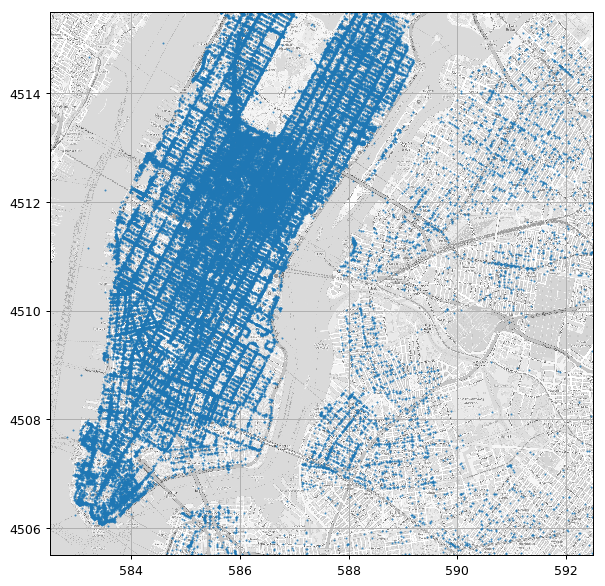

In [ ]:
## Create the figure and axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)

## Plot the map
ax.imshow(ny_map_image, extent=bbox, cmap='gray', alpha=0.7)
ax.plot(dataset['dropoff_easting'], dataset['dropoff_northing'], '.', markersize=1);

### Some Statistics of Ride Durations

count    100000.000000
mean         11.397227
std           7.012379
min           0.116667
25%           6.233333
50%           9.900000
75%          14.950000
max          59.666667
Name: duration, dtype: float64


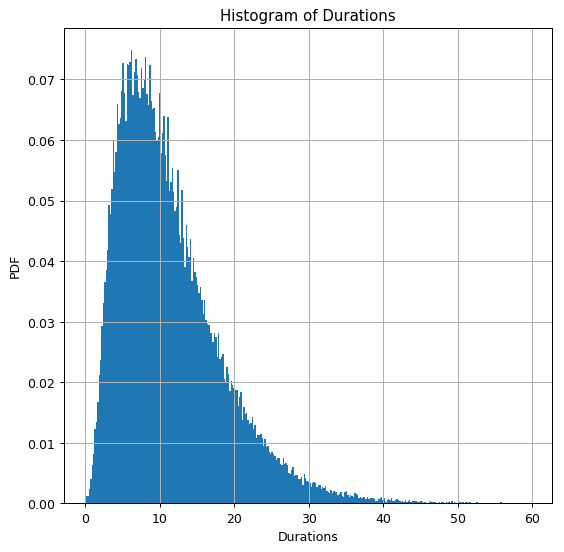

In [ ]:
print(dataset['duration'].describe())
ax = dataset['duration'].hist(bins=int(np.sqrt(len(dataset))), density=True)
ax.set_title("Histogram of Durations")
ax.set_xlabel('Durations')
ax.set_ylabel('PDF');

## 📜 Problem Definition

### The underlying process

- A passenger is generated with a random pick up and drop off location. $p\left(x\right)$.
- The duration of the ride is randomly generated, conditioned by the pickup and drop off locations.  $p\left(y|x\right)$.

### The task and goal

A regression problem: Find a prediction function for the ride duration based on the pickup and drop off locations.


### Evaluation method: Root Mean Squared Error (RMSE)

We shall use the RMSE risk function.

$$
R\left\{h, \left\{\boldsymbol{x},y\right\}\right\}=\sqrt{\frac{1}{N}\sum_i \left(h\left(\boldsymbol{x}_i\right)- y_i\right)^2}
$$

### 📚 Splitting the dataset

In [ ]:
n_samples = len(dataset)

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## Generating a vector of indices
indices = np.arange(n_samples)

## Shuffle the indices
rand_gen.shuffle(indices)

## Split the indices into 60% train / 20% validation / 20% test
n_samples_train = int(n_samples * 0.6)
n_samples_validation = int(n_samples * 0.2)
n_samples_test = n_samples - n_samples_train
train_indices = indices[:n_samples_train]
validation_indices = indices[n_samples_train:(n_samples_train + n_samples_validation)]
test_indices = indices[(n_samples_train + n_samples_validation):]

train_set = dataset.iloc[train_indices]
validation_set = dataset.iloc[validation_indices]
test_set = dataset.iloc[test_indices]

## 💡 Model & Learning Method Suggestion: Linear Least Squares

We shall use the linear least squares (no regularization) algorithm to solve this regression problem. 

## 📑 Features Selection - 1st Attempt

The most naive selection of features is to simply take the measurements themselves as the features. In our case, these would be the four coordinates. However, we can guess that it would probably not produce good results being a linear combination of the coordinates themselves.  We should try to find some better features to start with.

There is a reason to believe that the duration of the ride depends mostly on the distance between the two locations, and less on locations themselves. Let us start with a single feature which is the distance of the between the two locations:

$$
h\left(\boldsymbol{x}\right) = \theta_0\sqrt{\left(x_\text{drop off}-x_\text{pick up}\right)^2 + \left(y_\text{drop off}-y_\text{pick up}\right)^2}
$$

**Notice**: The model is not linear in the locations, and it does not have to be. The linearity is in the parameter of the model $\theta_0$

## ⚙️ Learning

### ✍️ Exercise 7.1

Find the optimal model parameter using linear least squares.

Use [np.linalg.pinv](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html) to calculate the Moore-Penrose pseudo inverse $\left(A^TA\right)^{-1}A^T$

(even though it is a 1D case we will use the matrix formulation for consistency) 

#### Solution 7.1

In [ ]:
## Extract y_train and y_test
y_train = train_set['duration'].values
y_validation = validation_set['duration'].values
y_test = test_set['duration'].values

## Deifne the feature extraction function
def extract_features(dataset):
    x_pickup = dataset['pickup_easting'].values
    y_pickup = dataset['pickup_northing'].values
    x_dropoff = dataset['dropoff_easting'].values
    y_dropoff = dataset['dropoff_northing'].values
    
    dist = ((x_dropoff - x_pickup) ** 2 + (y_dropoff - y_pickup) ** 2) ** 0.5

    phi = np.array([dist]).T
    
    return phi

## Calculate the feautres matrix for the train set
phi_train = extract_features(train_set)
## Calculate the model's parameters theta
theta = np.linalg.pinv(phi_train) @ y_train 

print('Theta is equal to: {}'.format(theta))

## Calculate the train risk
prediction_train = phi_train @ theta
loss_train = (prediction_train - y_train) ** 2
risk_train = loss_train.mean() ** 0.5

print('The risk on the train set is: {:.2f} min'.format(risk_train))

Theta is equal to: [4.30908784]
The risk on the train set is: 5.71 min


For one feature we can plot the linear regression problem on in a 2D plot

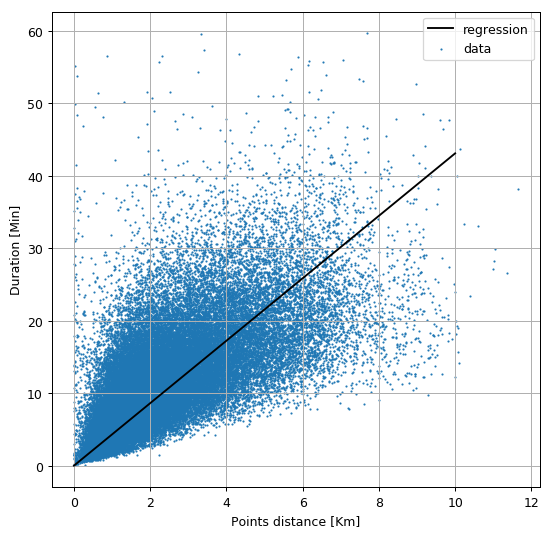

In [ ]:
fig, ax = plt.subplots()

## Plot the data with the linear regression line
ax.scatter(phi_train[:, 0], y_train, marker='.', s=2, label='data')
ax.grid(True)
ax.plot([0, 10], [0, theta[0] * 10], 'k', label='regression')
ax.legend()
ax.set_xlabel('Points distance [Km]')
ax.set_ylabel('Duration [Min]');

## ⏱️ Performance evaluation

Let us calculate the risk on the test set

In [ ]:
## Calculate the features matrix for the test set
phi_test = extract_features(test_set)

prediction_test = phi_test @ theta
loss_test = (prediction_test - y_test) ** 2
risk_test = loss_test.mean() ** 0.5

print('The risk on the test set is: {:.2f} min'.format(risk_test))

The risk on the test set is: 5.72 min


## 📑 Features Selection - Adding Pickup Location

Let us add some more features. If we assume that different areas of the city have different traffic loads, it would make sense to also add the location of the pickup and drop off in addition to the distance between the points.

Let add a second order polynomial of the pickup location to our prediction function:

$$
h\left(\boldsymbol{x}\right) 
= \theta_0\sqrt{\left(x_\text{drop off}-x_\text{pickup}\right)^2 + \left(y_\text{drop off}-y_\text{pickup}\right)^2} \\
+ \theta_1 + \theta_2 x_\text{pickup}  + \theta_3 y_\text{pickup} \\
+ \theta_4 x_\text{pickup}y_\text{pickup} \\
+ \theta_5 x_\text{pickup}^2 + \theta_6 y_\text{pickup}^2
$$

## ⚙️ Learning

### ✍️ Exercise 7.2

Repeat the learning process using the new model.

Now use [np.linalg.lstsq](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) instead of np.linalg.pinv to solve $Ax=b$.

**Numeric issues**: Calculating inverses of matrices can become highly inefficient and unstable, especially in high dimensions. It is recommended to avoid these calculations when possible. np.linalg.lstsq solves the least squares problem without calculating the inverse directly.

#### Solution 7.2

In [ ]:
## Deifne the feature extraction function
def extract_features(dataset):
    x_pickup = dataset['pickup_easting'].values
    y_pickup = dataset['pickup_northing'].values
    x_dropoff = dataset['dropoff_easting'].values
    y_dropoff = dataset['dropoff_northing'].values
    
    dist = ((x_dropoff - x_pickup) ** 2 + (y_dropoff - y_pickup) ** 2) ** 0.5

    phi = np.array([
        dist,
        np.ones_like(dist),
        x_pickup,
        y_pickup,
        x_pickup * y_pickup,
        x_pickup ** 2,
        y_pickup ** 2,
        ]).T
    
    return phi

## Calculate the feautres matrix for the train set
phi_train = extract_features(train_set)
## Calculate the model's parameters theta
theta, _, _, _ = np.linalg.lstsq(phi_train, y_train, rcond=-1) 

## Calculate the train risk
prediction_train = phi_train @ theta
loss_train = (prediction_train - y_train) ** 2
risk_train = loss_train.mean() ** 0.5

print('The risk on the train set is: {:.2f} min'.format(risk_train))

## Calculate the features matrix for the test set
phi_test = extract_features(test_set)

prediction_test = phi_test @ theta
loss_test = (prediction_test - y_test) ** 2
risk_test = loss_test.mean() ** 0.5

print('The risk on the test set is: {:.2f} min'.format(risk_test))

The risk on the train set is: 5.13 min
The risk on the test set is: 5.16 min


From here on we will use [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to perform linear regression.

## 📑 Features Selection - Higher order

Lets us add higher orders of the pickup location.


## ⚙️ Learning

### ✍️ Exercise 7.3

Add higher orders of the pickup location to the model. Run up to the 18th power of the polynomial. Plot the train risk and the validation risk as a function of the model's order.

**Important**: In order to avoid overflow when taking powers of the coordinates, remove a constant offset in each direction in order to be small numbers of the order of a unit.


### Solution 7.3

The optimal power is 10
The test risk of the optimal power is 5.152 [min]


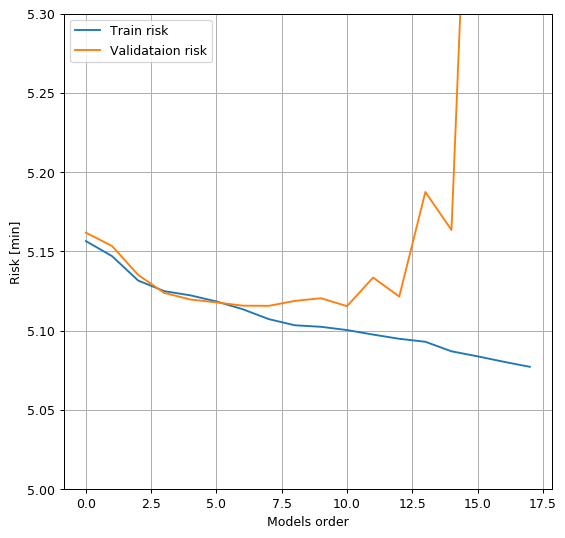

In [ ]:
from sklearn.linear_model import LinearRegression

## Deifne the feature extraction function
def extract_features(dataset, n_powers):
    
    x_center = 586
    y_center = 4510
    
    x_pickup = dataset['pickup_easting'].values - x_center
    y_pickup = dataset['pickup_northing'].values - y_center
    x_dropoff = dataset['dropoff_easting'].values - x_center
    y_dropoff = dataset['dropoff_northing'].values - y_center
    
    dist = ((x_dropoff - x_pickup) ** 2 + (y_dropoff - y_pickup) ** 2) ** 0.5

    powers1, powers2 = np.meshgrid(np.arange(n_powers + 1), np.arange(n_powers + 1))
    powers = np.stack((powers1.flatten(), powers2.flatten()), axis=0)
    powers = powers[:, powers.sum(axis=0) <= n_powers]

    phi = np.concatenate((
        dist[:, None],
        x_pickup[:,None] ** powers[0] * y_pickup[:,None] ** powers[1],
        ), axis=1)
    
    return phi

## Define the grid of polinomian powers to run over
powers_grid = np.arange(18)
## Initialize lists to store the calculated risks
risk_array_train = []
risk_array_validataion = []

## Run over the polynomial powers
for n_powers in powers_grid:
    ## Train
    phi_train = extract_features(train_set, n_powers)

    reg = LinearRegression(fit_intercept=False, normalize=True)
    reg.fit(phi_train, y_train)

    prediction_train = reg.predict(phi_train)
    loss_train = (prediction_train - y_train) ** 2
    risk_train = loss_train.mean() ** 0.5

    ## Test
    phi_validation = extract_features(validation_set, n_powers)

    prediction_validataion = reg.predict(phi_validation)
    loss_validataion = (prediction_validataion - y_validation) ** 2
    risk_validataion = loss_validataion.mean() ** 0.5

    risk_array_train.append(risk_train)
    risk_array_validataion.append(risk_validataion)

## Optimal results
optimal_power = powers_grid[np.argmin(risk_array_validataion)]

phi_train = extract_features(train_set, optimal_power)
reg = LinearRegression(fit_intercept=False, normalize=True)
reg.fit(phi_train, y_train)
                            
phi_test = extract_features(test_set, optimal_power)
prediction_test = reg.predict(phi_test)
loss_test = (prediction_test - y_test) ** 2
risk_test = loss_test.mean() ** 0.5

print('The optimal power is {}'.format(optimal_power))
print('The test risk of the optimal power is {:.3f} [min]'.format(risk_test))

## Plot risk sv. power
fig, ax = plt.subplots()
ax.plot(powers_grid, risk_array_train, label='Train risk')
ax.plot(powers_grid, risk_array_validataion, label='Validataion risk')
ax.grid(True)
ax.set_ylim(5., 5.3)
ax.set_xlabel('Model''s order')
ax.set_ylabel('Risk [min]')
ax.legend();

We can see that while the train risk keeps decreasing as we increase the polynomial's order, the test risk at some point starts to increase due to overfitting.

We will add regularization terms to our solution to reduce the effect of the overfit.

## ⚙️ Learning

### ✍️ Exercise 7.4

1. Repeat the last question using Ridge regression. Use $10^{-2}$ for the regularization parameter.
2. Repeat the last question with the LASSO model. Use $10^{-5}$ for the regularization parameter.

Use [sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) and [sklearn.linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).

Basically we would like to run a hyper-parameters check over the regularization parameters. Here they are given to you in order to save time.

#### Solution 7.4-1

The optimal power is 8
The test risk of the optimal power is 5.145


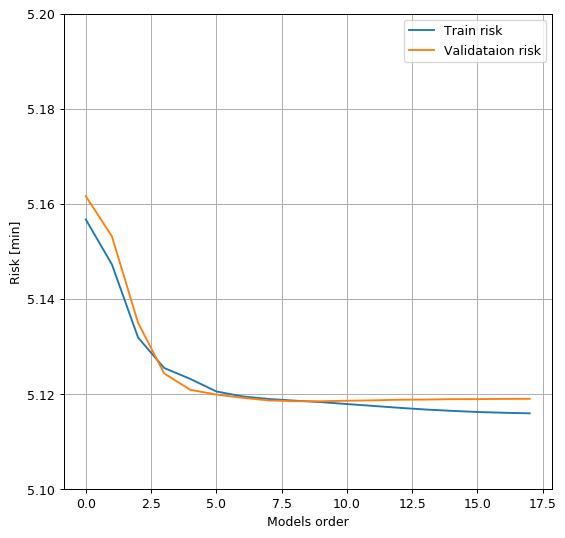

In [ ]:
from sklearn.linear_model import Ridge

# Initialize lists to store the calculated risks
risk_array_train = []
risk_array_validataion = []

## Run over the polynomial powers
for n_powers in powers_grid:
    ## Train
    phi_train = extract_features(train_set, n_powers)

    reg = Ridge(alpha=1e-2, fit_intercept=True, normalize=True, max_iter=1e4)
    reg.fit(phi_train, y_train)

    prediction_train = reg.predict(phi_train)
    loss_train = (prediction_train - y_train) ** 2
    risk_train = loss_train.mean() ** 0.5

    ## Test
    phi_validation = extract_features(validation_set, n_powers)

    prediction_validataion = reg.predict(phi_validation)
    loss_validataion = (prediction_validataion - y_validation) ** 2
    risk_validataion = loss_validataion.mean() ** 0.5

    risk_array_train.append(risk_train)
    risk_array_validataion.append(risk_validataion)

## Optimal results
optimal_power = powers_grid[np.argmin(risk_array_validataion)]

phi_train = extract_features(train_set, optimal_power)
reg = Ridge(alpha=1e-2, fit_intercept=True, normalize=True, max_iter=1e4)
reg.fit(phi_train, y_train)
                            
phi_test = extract_features(test_set, optimal_power)
prediction_test = reg.predict(phi_test)
loss_test = (prediction_test - y_test) ** 2
risk_test = loss_test.mean() ** 0.5

print('The optimal power is {}'.format(optimal_power))
print('The test risk of the optimal power is {:.3f}'.format(risk_test))

## Plot risk sv. power
fig, ax = plt.subplots()
ax.plot(powers_grid, risk_array_train, label='Train risk')
ax.plot(powers_grid, risk_array_validataion, label='Validataion risk')
ax.grid(True)
ax.set_ylim(5.1, 5.2)
ax.set_xlabel('Model''s order')
ax.set_ylabel('Risk [min]')
ax.legend();

#### Solution 7.4-2

The optimal power is 17
The test risk of the optimal power is 5.143


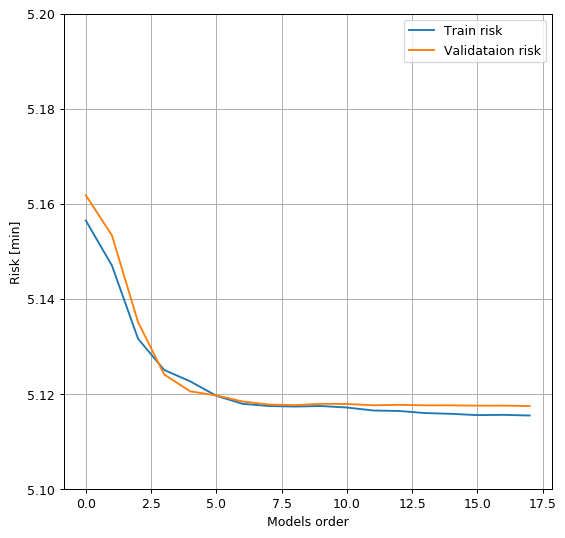

In [ ]:
from sklearn.linear_model import Lasso

# Initialize lists to store the calculated risks
risk_array_train = []
risk_array_validataion = []

## Run over the polynomial powers
for n_powers in powers_grid:
    ## Train
    phi_train = extract_features(train_set, n_powers)

    reg = Lasso(alpha=1e-5, fit_intercept=True, normalize=True, max_iter=1e4)
    reg.fit(phi_train, y_train)

    prediction_train = reg.predict(phi_train)
    loss_train = (prediction_train - y_train) ** 2
    risk_train = loss_train.mean() ** 0.5

    ## Test
    phi_validation = extract_features(validation_set, n_powers)

    prediction_validataion = reg.predict(phi_validation)
    loss_validataion = (prediction_validataion - y_validation) ** 2
    risk_validataion = loss_validataion.mean() ** 0.5

    risk_array_train.append(risk_train)
    risk_array_validataion.append(risk_validataion)

## Optimal results
optimal_power = powers_grid[np.argmin(risk_array_validataion)]

phi_train = extract_features(train_set, optimal_power)
reg = Lasso(alpha=1e-5, fit_intercept=True, normalize=True, max_iter=1e4)
reg.fit(phi_train, y_train)
                            
phi_test = extract_features(test_set, optimal_power)
prediction_test = reg.predict(phi_test)
loss_test = (prediction_test - y_test) ** 2
risk_test = loss_test.mean() ** 0.5

print('The optimal power is {}'.format(optimal_power))
print('The test risk of the optimal power is {:.3f}'.format(risk_test))

## Plot risk sv. power
fig, ax = plt.subplots()
ax.plot(powers_grid, risk_array_train, label='Train risk')
ax.plot(powers_grid, risk_array_validataion, label='Validataion risk')
ax.grid(True)
ax.set_ylim(5.1, 5.2)
ax.set_xlabel('Model''s order')
ax.set_ylabel('Risk [min]')
ax.legend();

Indeed as expected regularization helps reduce the overfit. 

**Notice**: Regularization does not prevent overfit, but simply reduces it's severity. If we will continue the figure to even higher orders the validation graphs of the regularized algorithms are expected to go up as well.

Let us look at the learned parameters of LASSO

Number of nparameters: 172
Number of non zero values: 26


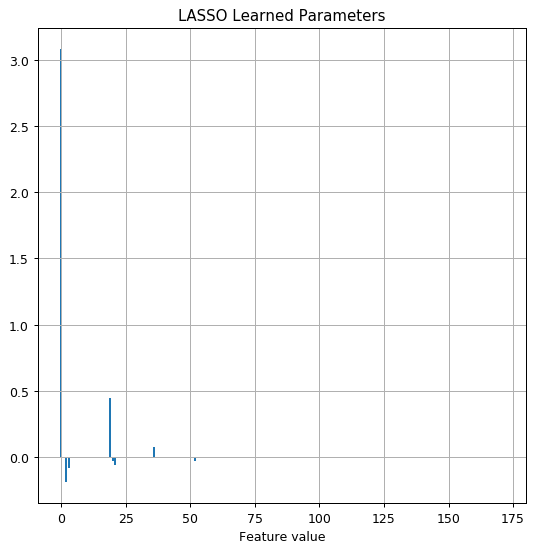

In [ ]:
## Print the number of non-zeros parameters
print('Number of nparameters: {}'.format(len(reg.coef_)))
print('Number of non zero values: {}'.format((np.abs(reg.coef_) > 1e-8).sum()))

## plot parameters
fig, ax = plt.subplots()
ax.set_title('LASSO Learned Parameters')
ax.bar(np.arange(len(reg.coef_)), reg.coef_)
ax.grid(True)
ax.set_xlabel('Feature index')
ax.set_xlabel('Feature value');

As expected LASSO have selected a sparse set of parameters to have non-zero value. Out of the 172 parameters only 26 have a significant value.

## 🏢 A SImple Example for Why L1 Creates Sparsity

To understand why an $L1$ regularization term results in a sparse solution think about the following example.

Say there is some big data company which wants to hire contractors to collect 1M samples of some data. Let us also assume that there are only 3 contractors, which have different efficiency:

- Worker 1 collects 100 samples per hour.
- Worker 2 collects 99 samples per hour.
- Worker 3 collects 101 samples per hour.

We shall look at two cases:

### The $L2$ case

The payment is proportional to the squared number of hours: $\alpha \cdot \text{number_of_hours}^2$.

In this case, since the three contractors have more or less the same efficiency, the company would prefer to spread the work more or equally between them.

### The $L1$ case

The payment is linear in the number of hours: $\alpha \cdot \text{number_of_hours}$.

In this case, the company would prefer to hire only the best worker (#3) for the job and leave out the other two others.

### The Analogy to Linear Regression

The analogy to our case is as follow:
- The number of collected samples <=> The objecting we are trying to optimize.
- The different workers <=> The different features we are using.
- The payment <~> regularization term.

In a similar manner to the big data company, the $L1$ regularization makes the optimization prefer to use non zero weights only on the features which contributed the most to minimize the objective function.

## 🗺️ Visualization of The Learned Location Based Correction

Just for fun, let us plot the extra learned term of the duration as a function of the pickup location. This is, in fact, the learned correction to the duration according to the traffic in the city.

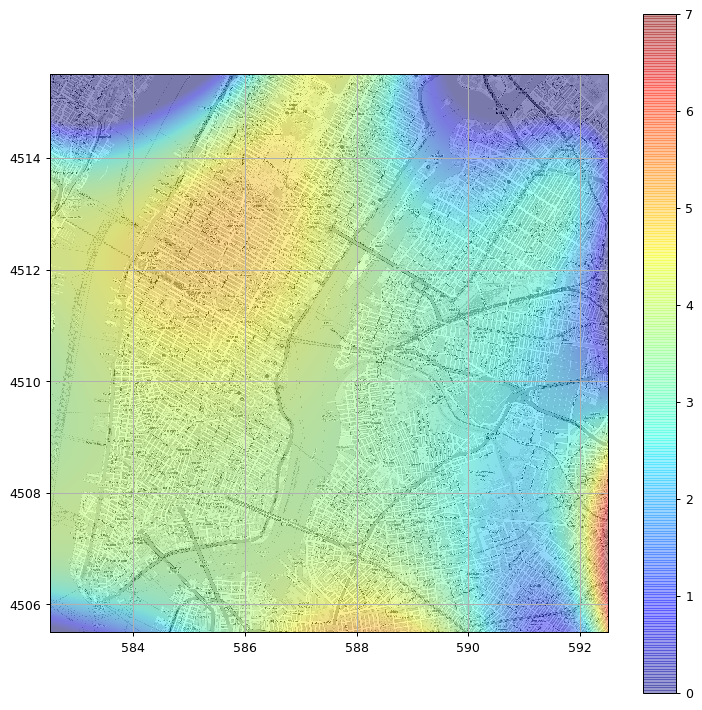

In [ ]:
## Retrain model for Rigde with a power of 8.
power = 8

phi_train = extract_features(train_set, power)
reg = Ridge(alpha=1e-2, fit_intercept=True, normalize=True, max_iter=1e4)
reg.fit(phi_train, y_train)

## Define a image grid to paint overr the picture.
x1_grid, x2_grid = np.meshgrid(np.arange(bbox[0], bbox[1], 0.01), np.arange(bbox[2], bbox[3], 0.01))

phi_grid = extract_features(pd.DataFrame({
    'pickup_easting': x1_grid.flatten() ,
    'pickup_northing': x2_grid.flatten() ,
    'dropoff_easting': x1_grid.flatten() ,
    'dropoff_northing': x2_grid.flatten() ,
     }), power)

## Calculate values over grid
prediction_map = reg.predict(phi_grid).reshape(x1_grid.shape)

## Plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(ny_map_image, extent=bbox, cmap='gray')
img_obj = ax.imshow(prediction_map, extent=bbox, origin='lower', cmap='jet', alpha=0.4, vmin=0, vmax=7)
plt.colorbar(img_obj);

We can see that as a by-product we have learned the amount of traffic loads around the city.

In [ ]:
%%html
<link rel="stylesheet" href="../css/style.css"> <!--Setting styles - You can simply ignore this line-->